In [19]:
#import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#import and convert dataset to dataframe
police_df = pd.read_excel('./Data/Cases of Police Brutality in Nigeria.xlsx')

In [21]:
police_df.head()

,victim,date_of_death,age,gender,city,state,manner_of_death,weapon,reason_for_killing,suspect,police_investigation
0,Emeka Ugwuoke,"March, 2002",17.0,M,Nsukka,Enugu,mutilated,unarmed,unknown,police,officer dismissed
1,Izuchukwu Ayogu,"March, 2002",16.0,M,Nsukka,Enugu,mutilated,unarmed,unknown,police,officer dismissed
2,Chinedu Ani,"Aug 1, 2005",NaN,M,Ogui,Enugu,shot,unarmed,suspected armed robber,police,unknown
3,Daniel Adewuyi Tella,"Feb 7, 2006",27.0,M,Festac,Lagos,tortured,unarmed,unknown,police,no investigation
4,Godgift Ferguson Ekerete,"July 3, 2008",24.0,M,Port Harcourt,Rivers,shot,unarmed,suspected armed robber,police,no investigation


In [22]:
#split date to month and year
police_df['date_of_death'].str.split(',', expand=True)
#rename the unnamed columns 
police_df[['Month_Day', 'death_year',]] = police_df['date_of_death'].str.split(',', expand=True)
#again, split data to month and day
police_df['Month_Day'].str.split(' ', expand=True)
#rename split columns for month and day
police_df[['death_month', 'Day',]] = police_df['Month_Day'].str.split(' ', expand=True)
#we won't be needing the date_of_death, month_day and day columns, so drop them
police_df = police_df.drop(columns=['date_of_death', 'Month_Day', 'Day'])

In [23]:
police_df.head()

,victim,age,gender,city,state,manner_of_death,weapon,reason_for_killing,suspect,police_investigation,death_year,death_month
0,Emeka Ugwuoke,17.0,M,Nsukka,Enugu,mutilated,unarmed,unknown,police,officer dismissed,2002,March
1,Izuchukwu Ayogu,16.0,M,Nsukka,Enugu,mutilated,unarmed,unknown,police,officer dismissed,2002,March
2,Chinedu Ani,NaN,M,Ogui,Enugu,shot,unarmed,suspected armed robber,police,unknown,2005,Aug
3,Daniel Adewuyi Tella,27.0,M,Festac,Lagos,tortured,unarmed,unknown,police,no investigation,2006,Feb
4,Godgift Ferguson Ekerete,24.0,M,Port Harcourt,Rivers,shot,unarmed,suspected armed robber,police,no investigation,2008,July


In [24]:
#show information about the dataframe
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   victim                58 non-null     object 
 1   age                   39 non-null     float64
 2   gender                58 non-null     object 
 3   city                  58 non-null     object 
 4   state                 58 non-null     object 
 5   manner_of_death       58 non-null     object 
 6   weapon                58 non-null     object 
 7   reason_for_killing    58 non-null     object 
 8   suspect               58 non-null     object 
 9   police_investigation  58 non-null     object 
 10  death_year            58 non-null     object 
 11  death_month           58 non-null     object 
dtypes: float64(1), object(11)
memory usage: 5.6+ KB


In [25]:
#dataframe shape
police_df.shape

(58, 12)

In [26]:
#check for missing value
police_df.isnull().any()

victim                  False
age                      True
gender                  False
city                    False
state                   False
manner_of_death         False
weapon                  False
reason_for_killing      False
suspect                 False
police_investigation    False
death_year              False
death_month             False
dtype: bool

In [27]:
police_df.mean()

age    27.358974
dtype: float64

In [28]:
#fill up missing values
police_df = police_df.fillna(police_df.mean())

In [29]:
police_df.isnull().sum()

victim                  0
age                     0
gender                  0
city                    0
state                   0
manner_of_death         0
weapon                  0
reason_for_killing      0
suspect                 0
police_investigation    0
death_year              0
death_month             0
dtype: int64

In [30]:
#obtain descriptive statistics of the dataset
police_df.describe(include='all')

,victim,age,gender,city,state,manner_of_death,weapon,reason_for_killing,suspect,police_investigation,death_year,death_month
count,58,58.000000,58,58,58,58,58,58,58,58,58,58
unique,58,NaN,2,34,17,7,1,11,4,9,14,14
top,Segun Samson,NaN,M,Port Harcourt,Rivers,shot,unarmed,unknown,police,no investigation,2019,July
freq,1,NaN,52,10,17,40,58,17,45,33,17,9
mean,NaN,27.358974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,8.255752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,27.358974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,27.839744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#mean age of victims grouped by male and female
police_df_age = police_df.groupby('gender').mean().reset_index()
round(police_df_age)

,gender,age
0,F,25.0
1,M,28.0


__mean age of victims that encounter police brutality for male is 28 years, for female is 25 years.__

In [32]:
#group victims by manner of death
police_df_MoD = police_df.groupby('manner_of_death')['victim'].count().sort_values(ascending=False)

In [33]:
police_df_MoD = police_df_MoD.reset_index()

In [34]:
police_df_MoD['percent_MoD'] = (police_df_MoD['victim'] / 58)*100
police_df_MoD = round(police_df_MoD)
police_df_MoD.head()

,manner_of_death,victim,percent_MoD
0,shot,40,69.0
1,unknown,9,16.0
2,tortured,4,7.0
3,mutilated,2,3.0
4,tortured and raped,1,2.0


__shooting was recorded as the highest form (69 per cent) in which police brutality was carried out by operatives of the Nigerian police force, followed by the disappearance of suspects in their custody (16 per cent) and torture (7 per cent).__

Text(0.5, 0, 'Manner of Death')

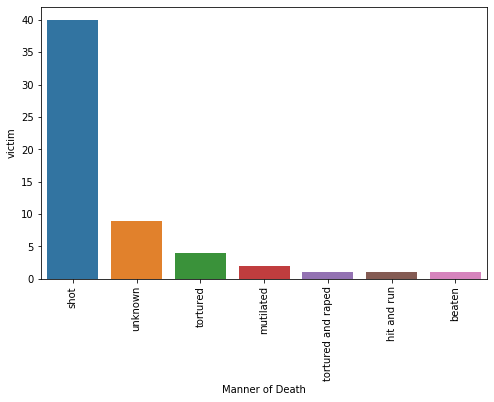

In [35]:
#plot a barchart showing manner_of_death by age
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data=police_df_MoD, x='manner_of_death', y='victim')
plt.xlabel('Manner of Death')

__Both male and female victims died mostly through shooting. Unknown refers to when the police can't provide information about the whereabouts of a suspect that was in their custody.__

In [36]:
#group victims by reason for death
police_df_RfD = police_df.groupby('reason_for_killing')['victim'].count().sort_values(ascending=False)
police_df_RfD = police_df_RfD.reset_index()
police_df_RfD['percent_RfD'] = (police_df_RfD['victim'] / 58)*100
police_df_RfD = round(police_df_RfD)
police_df_RfD.head(15)

,reason_for_killing,victim,percent_RfD
0,unknown,17,29.0
1,suspected armed robber,9,16.0
2,stray bullet,7,12.0
3,argument,6,10.0
4,police raid,4,7.0
5,failed to pay bribe,4,7.0
6,traffic violation,3,5.0
7,protesting,3,5.0
8,allegedly tried to flee,3,5.0
9,suspected kidnapper,1,2.0


Text(0.5, 0, 'Reason for Killing')

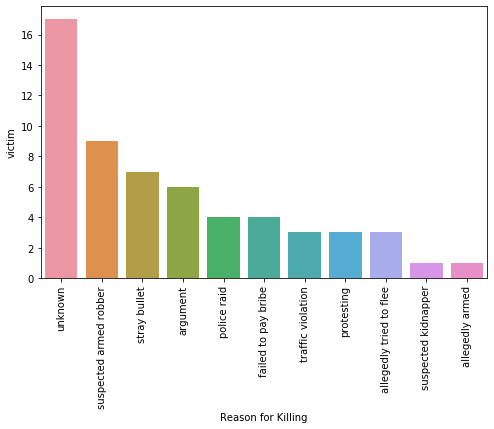

In [37]:
#plot a barchart showing reason for death
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(data=police_df_RfD, x='reason_for_killing', y='victim')
plt.xlabel('Reason for Killing')

__This refers to what made the victims a target of police brutality. For 29 per cent of the cases, it wasn't clear why the victims were picked up, in 16 per cent of the cases the victims were suspected armed robbers, 12 per cent of the victims were unfortunately caught by a stray bullet and 10 per cent of the victims died after having a confrontation with a police man.__

In [38]:
#group victims by state where they were killed
police_df_state = police_df.groupby('state')['victim'].count().sort_values(ascending=False)

In [39]:
police_df_state = police_df_state.reset_index()

In [40]:
#calculate percentage of death for state
police_df_state['percent'] = (police_df_state['victim'] / 58)*100
police_df_state = round(police_df_state)
police_df_state.head()

,state,victim,percent
0,Rivers,17,29.0
1,Lagos,10,17.0
2,FCT,6,10.0
3,Enugu,6,10.0
4,Anambra,2,3.0


__Rivers state leads with number of deaths to police brutality (29 per cent), followed by Lagos (17 per cent) and FCT and Enugu (both 10 per cent).__

In [41]:
#group victims by reason for death
police_df_g = police_df.groupby('gender')['victim'].count().sort_values(ascending=False)
police_df_g = police_df_g.reset_index()
police_df_g['percent_g'] = (police_df_g['victim'] / 58)*100
police_df_g = round(police_df_g)
police_df_g.head()

,gender,victim,percent_g
0,M,52,90.0
1,F,6,10.0


__90 per cent of victims were males and 10 per cent of victims were females__

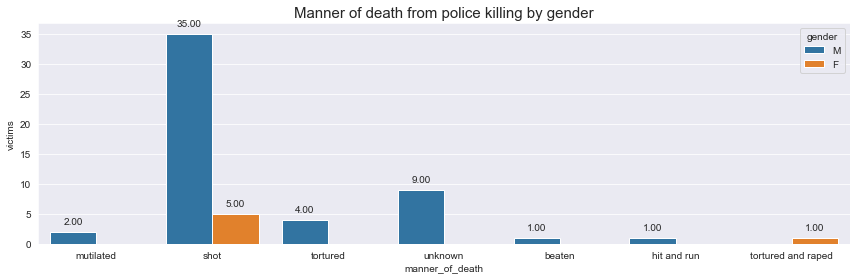

In [42]:
#manner of death by gender
plt.figure(figsize=(12,4))
sns.set_style("darkgrid")
splot = sns.countplot(x='manner_of_death', hue='gender', data=police_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('victims')
plt.title('Manner of death from police killing by gender', size=15)
plt.tight_layout()

__Males are more likely to be shot, mutilated, tortured and beaten by the police while females are more likely to be sexually molested.__

In [43]:
#deaths by month
police_df_DbM = police_df.groupby('death_month')['victim'].count().sort_values(ascending=False)

In [44]:
police_df_DbM = police_df_DbM.reset_index()

In [45]:
#calculate percentage of death for state
police_df_DbM['percent_DbM'] = (police_df_DbM['victim'] / 58)*100
police_df_DbM = round(police_df_DbM)
police_df_DbM.head()

,death_month,victim,percent_DbM
0,July,9,16.0
1,April,8,14.0
2,May,7,12.0
3,March,7,12.0
4,Sept,5,9.0


__July recorded the highest number of killings (16 per cent)__

In [46]:
#deaths by year
police_df_DbY = police_df.groupby('death_year')['victim'].count().sort_values(ascending=False)

In [47]:
police_df_DbY = police_df_DbY.reset_index()

In [48]:
police_df_DbY['percent_DbY'] = (police_df_DbY['victim'] / 58)*100
police_df_DbY = round(police_df_DbY)
police_df_DbY.head()

,death_year,victim,percent_DbY
0,2019,17,29.0
1,2009,11,19.0
2,2008,9,16.0
3,2020,7,12.0
4,2018,2,3.0


__The year 2019 recorded the highest number of killings (29 per cent) of unarmed civilians by the police__

In [49]:
#group victims by police investigation
police_df_pi = police_df.groupby('police_investigation')['victim'].count().sort_values(ascending=False)
police_df_pi = police_df_pi.reset_index()
police_df_pi['percent_RfD'] = (police_df_pi['victim'] / 58)*100
police_df_pi = round(police_df_pi)
police_df_pi.head(10)

,police_investigation,victim,percent_RfD
0,no investigation,33,57.0
1,unknown,10,17.0
2,officer charged to court,6,10.0
3,officer dismissed,3,5.0
4,officers charged to court,2,3.0
5,officers indicted,1,2.0
6,officer promoted,1,2.0
7,officer dismissed and prosecuted,1,2.0
8,officer convicted,1,2.0


__57 per cent of the cases where not officially investigated by the police in the first place, 17 per cent of the cases did not produce any information about the outcome of an investigation that was conducted. Convictions are rarely had (2 per cent) with dismissal of the officer (5 per cent) from the police force the most common form of punishment.__